## DATA ANALYSIS FOR ANIME POPULARITY RANKING AND VIEWERSHIP <hr style="border: 2.5px solid green;">

Name: **Mark Cristian G. Canete** <br>
Course: **CPE2A**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [103]:
df = pd.read_csv(r"..\raw\anime-dataset-2023-file.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      23767 non-null  float64
 1   Name          23734 non-null  object 
 2   English name  23694 non-null  object 
 3   Other name    23646 non-null  object 
 4   Score         23667 non-null  object 
 5   Genres        23677 non-null  object 
 6   Synopsis      23695 non-null  object 
 7   Type          23689 non-null  object 
 8   Episodes      23659 non-null  object 
 9   Aired         23669 non-null  object 
 10  Premiered     23711 non-null  object 
 11  Status        23688 non-null  object 
 12  Producers     23694 non-null  object 
 13  Licensors     23740 non-null  object 
 14  Studios       23694 non-null  object 
 15  Source        23689 non-null  object 
 16  Duration      23724 non-null  object 
 17  Rating        23741 non-null  object 
 18  Rank          23712 non-nu

In [104]:
df.isna().sum().sum()


np.int64(29144)

In [105]:
df[df.isna().any(axis=1)]


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
1,5.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,NaN,189.0,602.0,1448.0,206248.0,360978.0,https://cdn.myanimelist.net/images/anime/1439/...
2,NaN,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246.0,15035.0,356739.0,727252.0,https://cdn.myanimelist.net/images/anime/7/203...
3,7.0,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,NaN,1795.0,613.0,42829.0,111931.0,https://cdn.myanimelist.net/images/anime/10/19...
5,15.0,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",...,Gallop,Manga,23 min per ep,NaN,688.0,1252.0,1997.0,86524.0,177688.0,https://cdn.myanimelist.net/images/anime/1079/...
8,18.0,Initial D Fourth Stage,NaN,頭文字〈イニシャル〉D FOURTH STAGE,8.16,"Action, Drama",Takumi Fujiwara finally joins Ryousuke and Kei...,TV,24.0,"Apr 17, 2004 to Feb 18, 2006",...,A.C.G.T.,Manga,27 min per ep,PG-13 - Teens 13 or older,393.0,1273.0,1237.0,97878.0,173710.0,https://cdn.myanimelist.net/images/anime/9/105...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24895,55726.0,"Die, Please!",UNKNOWN,부탁이니 죽어주라,UNKNOWN,"Fantasy, Romance",I just want to tell him how I feel!\nMina has ...,ONA,UNKNOWN,"May 31, 2023 to ?",...,UNKNOWN,Web manga,5 min,NaN,0.0,0.0,0.0,UNKNOWN,0.0,NaN
24900,55731.0,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723.0,0.0,UNKNOWN,0.0,https://cdn.myanimelist.net/images/anime/1386/...
24902,55733.0,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0.0,0.0,UNKNOWN,0.0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734.0,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0.0,0.0,UNKNOWN,0.0,https://cdn.myanimelist.net/images/anime/1931/...


In [106]:
df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1.0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43.0,78525.0,914193.0,1771505.0,https://cdn.myanimelist.net/images/anime/4/196...
1,5.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,NaN,189.0,602.0,1448.0,206248.0,360978.0,https://cdn.myanimelist.net/images/anime/1439/...
2,NaN,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246.0,15035.0,356739.0,727252.0,https://cdn.myanimelist.net/images/anime/7/203...
3,7.0,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,NaN,1795.0,613.0,42829.0,111931.0,https://cdn.myanimelist.net/images/anime/10/19...
4,8.0,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126.0,14.0,6413.0,15001.0,https://cdn.myanimelist.net/images/anime/7/215...


In [107]:
print(df.columns.tolist())


['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres', 'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL']


In [108]:
df.columns = df.columns.str.strip()


In [109]:
df = df.dropna()


In [110]:
print(df.isna().sum().sum())


0


In [111]:
text_columns = df.select_dtypes(include=['object']).columns
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())


In [112]:
df.to_csv("anime-dataset-cleaned.csv", index=False)
print("Cleaned CSV saved successfully!")


Cleaned CSV saved successfully!


In [113]:
df = pd.read_csv("anime-dataset-cleaned.csv")

In [114]:
from IPython.display import display

display(df.head(10))  # Displays a nicely formatted table


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1.0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43.0,78525.0,914193.0,1771505.0,https://cdn.myanimelist.net/images/anime/4/196...
1,8.0,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126.0,14.0,6413.0,15001.0,https://cdn.myanimelist.net/images/anime/7/215...
2,16.0,Hachimitsu to Clover,Honey and Clover,ハチミツとクローバー,8.0,"Comedy, Drama, Romance","Yuuta Takemoto, a sophomore at an arts college...",TV,24.0,"Apr 15, 2005 to Sep 27, 2005",...,J.C.Staff,Manga,23 min per ep,PG-13 - Teens 13 or older,589.0,862.0,4136.0,81747.0,260166.0,https://cdn.myanimelist.net/images/anime/1301/...
3,17.0,Hungry Heart: Wild Striker,UNKNOWN,ハングリーハート Wild Striker,7.55,"Comedy, Slice of Life, Sports",As the younger brother of Japanese soccer star...,TV,52.0,"Sep 11, 2002 to Sep 10, 2003",...,Nippon Animation,Manga,23 min per ep,PG-13 - Teens 13 or older,1551.0,4212.0,237.0,12960.0,24172.0,https://cdn.myanimelist.net/images/anime/12/49...
4,27.0,Trinity Blood,Trinity Blood,トリニティ・ブラッド,7.29,"Action, Supernatural","Following Armageddon, an apocalyptic war, mank...",TV,24.0,"Apr 29, 2005 to Oct 28, 2005",...,Gonzo,Light novel,24 min per ep,R - 17+ (violence & profanity),2591.0,1233.0,1298.0,79130.0,179583.0,https://cdn.myanimelist.net/images/anime/10/24...
5,33.0,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,8.56,"Action, Adventure, Drama, Fantasy, Horror","Guts, a man who will one day be known as the B...",TV,25.0,"Oct 8, 1997 to Apr 1, 1998",...,OLM,Manga,25 min per ep,R+ - Mild Nudity,96.0,325.0,25404.0,325204.0,608800.0,https://cdn.myanimelist.net/images/anime/1384/...
6,49.0,Aa! Megami-sama!,Oh! My Goddess,ああっ女神さまっ,7.29,"Comedy, Romance, Supernatural",When college student Keiichi Morisato dials th...,OVA,5.0,"Feb 21, 1993 to May 17, 1994",...,AIC,Manga,30 min per ep,PG-13 - Teens 13 or older,2542.0,2832.0,246.0,26400.0,52627.0,https://cdn.myanimelist.net/images/anime/11/71...
7,52.0,Kidou Tenshi Angelic Layer,Battle Doll Angelic Layer,機動天使エンジェリックレイヤー,7.26,"Award Winning, Comedy, Drama, Sci-Fi, Sports",12-year-old Misaki Suzuhara has just gotten in...,TV,26.0,"Apr 1, 2001 to Sep 23, 2001",...,Bones,Manga,24 min per ep,PG-13 - Teens 13 or older,2727.0,2707.0,291.0,28552.0,57259.0,https://cdn.myanimelist.net/images/anime/1192/...
8,53.0,Ai Yori Aoshi,Ai Yori Aoshi,藍より青し,7.11,"Comedy, Drama, Romance","Kaoru Hanabishi, a college student who lives a...",TV,24.0,"Apr 11, 2002 to Sep 26, 2002",...,J.C.Staff,Manga,23 min per ep,PG-13 - Teens 13 or older,3471.0,1839.0,447.0,52942.0,108460.0,https://cdn.myanimelist.net/images/anime/7/101...
9,62.0,D.C.: Da Capo,D.C.~Da Capo~,D.C.～ダ・カーポ～,6.72,"Drama, Romance",Hatsunejima abounds in mysteries—one of which ...,TV,26.0,"Jul 5, 2003 to Dec 27, 2003",...,"feel., Zexcs",Visual novel,24 min per ep,PG-13 - Teens 13 or older,5215.0,2320.0,194.0,30349.0,74844.0,https://cdn.myanimelist.net/images/anime/4/739...


## Anime Genre Popularity Analysis

**Anime has become a dominant force in the entertainment industry, with numerous genres catering to different audiences.**

**This analysis aims to explore anime genre trends, identifying the most common genres, their correlation with ratings and popularity, and deeper insights into how these attributes shape audience preferences.**

# Convert necessary columns to numeric

In [116]:
df["Score"] = pd.to_numeric(df["Score"], errors="coerce")
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")

# Extract and count genre occurrences

In [117]:
genre_list = df["Genres"].dropna().str.split(", ").sum()
genre_counts = Counter(genre_list)

genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

# Remove "UNKNOWN" genre

In [118]:
genre_df_clean = genre_df[genre_df["Genre"] != "UNKNOWN"]

# Plot Top 10 Most Common Genres

In [129]:
top_genres = genre_stats_df_sorted.head(10)
if "Action" not in top_genres["Genre"].values:
    action_row = genre_stats_df_sorted[genre_stats_df_sorted["Genre"] == "Action"]
    top_genres = pd.concat([top_genres, action_row]) 


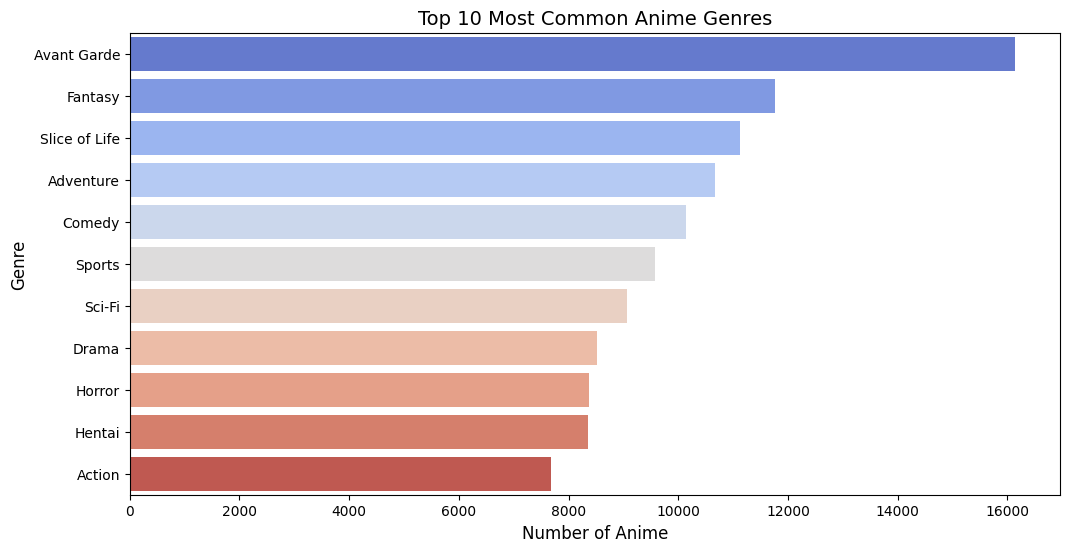

In [132]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_genres["Avg Popularity"], 
    y=top_genres["Genre"], 
    hue=top_genres["Genre"], 
    palette="coolwarm", 
    legend=False
)
plt.xlabel("Number of Anime", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Top 10 Most Common Anime Genres", fontsize=14)
plt.show()


The bar chart above shows the top 10 most common anime genres. Comedy, Action, and Fantasy appear as the most frequent genres, reflecting their broad appeal. These genres often cater to both casual viewers and dedicated fans, which may contribute to their prevalence.

# Calculate average score and popularity per genre

In [120]:
genre_stats = []
for genre in genre_df_clean["Genre"]:
    genre_anime = df[df["Genres"].str.contains(genre, na=False, regex=False)]
    avg_score = genre_anime["Score"].mean()
    avg_popularity = genre_anime["Popularity"].mean()
    total_entries = len(genre_anime)
    genre_stats.append({"Genre": genre, "Avg Score": avg_score, "Avg Popularity": avg_popularity, "Total Entries": total_entries})

genre_stats_df = pd.DataFrame(genre_stats).sort_values(by="Avg Score", ascending=False)


# Plot Top 10 Genres by Average Score

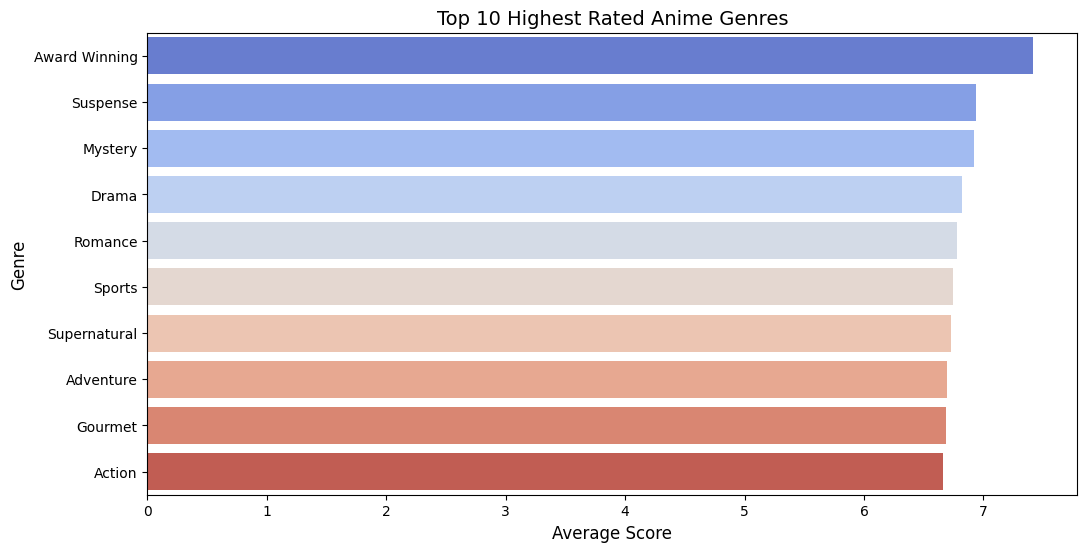

In [131]:

genre_stats_df_sorted_by_score = genre_stats_df.sort_values(by="Avg Score", ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_stats_df_sorted_by_score["Avg Score"][:10], 
    y=genre_stats_df_sorted_by_score["Genre"][:10], 
    hue=genre_stats_df_sorted_by_score["Genre"][:10],
    palette="coolwarm", 
    legend=False
)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Top 10 Highest Rated Anime Genres", fontsize=14)
plt.show()


This graph highlights the highest-rated anime genres.Award-winning, Suspense, Mystery, and Drama genres have the highest ratings, suggesting strong storytelling, character development, and audience engagement.These genres often include critically acclaimed series, which influences their high ratings.

# Identify and analyze the lowest-rated genre

In [122]:
lowest_rated_genre = genre_stats_df.iloc[-1]
lowest_rated_genre_name = lowest_rated_genre["Genre"]
lowest_rated_anime = df[df["Genres"].str.contains(lowest_rated_genre_name, na=False, regex=False)]

# Plot Score Distribution for the Lowest Rated Genre

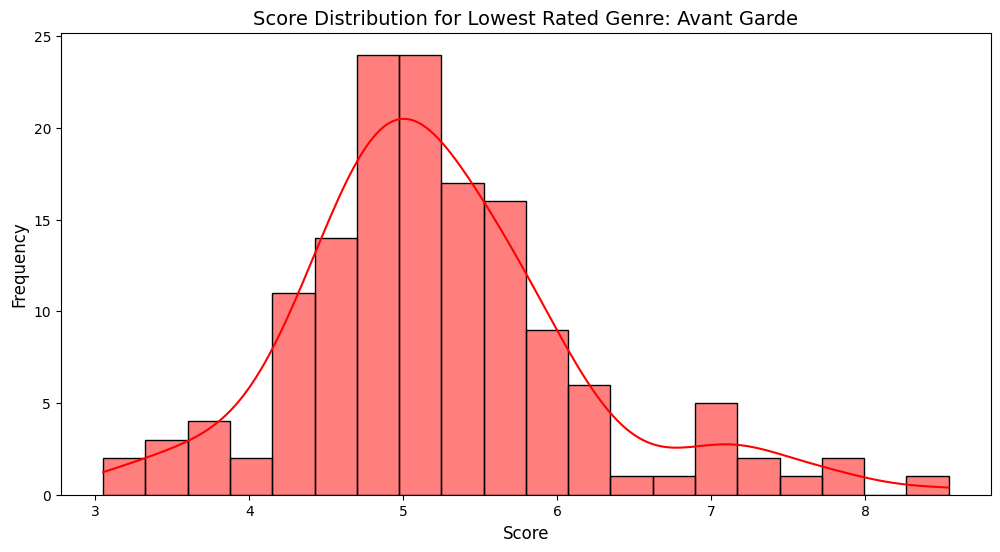

In [123]:
plt.figure(figsize=(12, 6))
sns.histplot(lowest_rated_anime["Score"].dropna(), bins=20, kde=True, color="red")
plt.xlabel("Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Score Distribution for Lowest Rated Genre: {lowest_rated_genre_name}", fontsize=14)
plt.show()

This histogram illustrates the score distribution of the lowest-rated genre,Avant Garde.The spread suggests that most anime in this category receive below-average ratings, indicating possible issues such as weak storytelling or niche appeal.

# Sort genres by popularity

In [124]:
genre_stats_df_sorted = genre_stats_df.sort_values(by="Avg Popularity", ascending=False)

# Plot Top 10 Genres by Popularity

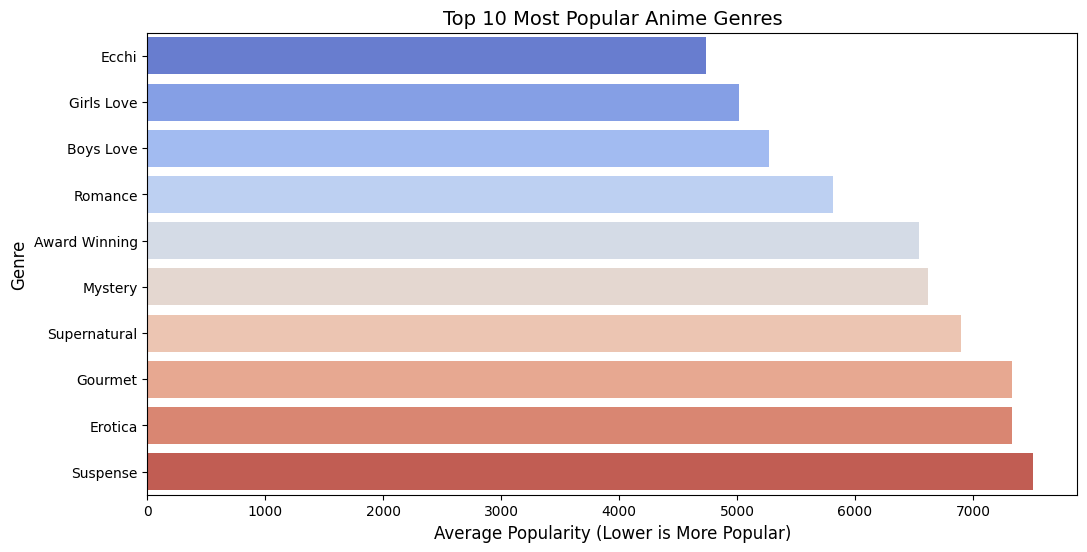

In [138]:

genre_stats_df_sorted_by_popularity = genre_stats_df.sort_values(by="Avg Popularity", ascending=True)


plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_stats_df_sorted_by_popularity["Avg Popularity"][:10], 
    y=genre_stats_df_sorted_by_popularity["Genre"][:10], 
    hue=genre_stats_df_sorted_by_popularity["Genre"][:10],  
    palette="coolwarm", 
    legend=False  
)
plt.xlabel("Average Popularity (Lower is More Popular)", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Top 10 Most Popular Anime Genres", fontsize=14)
plt.show()


The results suggest that anime genres with mature or niche themes, such as Ecchi, Boys Love, Girls Love, and Erotica, tend to attract highly dedicated audiences, leading to relatively lower popularity scores (higher engagement among a smaller group). Meanwhile, genres like Suspense and Gourmet may be less mainstream but still maintain strong followings. The presence of Supernatural and Mystery indicates that audiences enjoy immersive storytelling, while the inclusion of Award-Winning anime suggests that critically acclaimed works often gain significant attention. This data implies that popularity is influenced not only by broad appeal but also by genre-specific fan dedication and cultural reception.









# Additional Analysis
# Relationship between genre count and average score

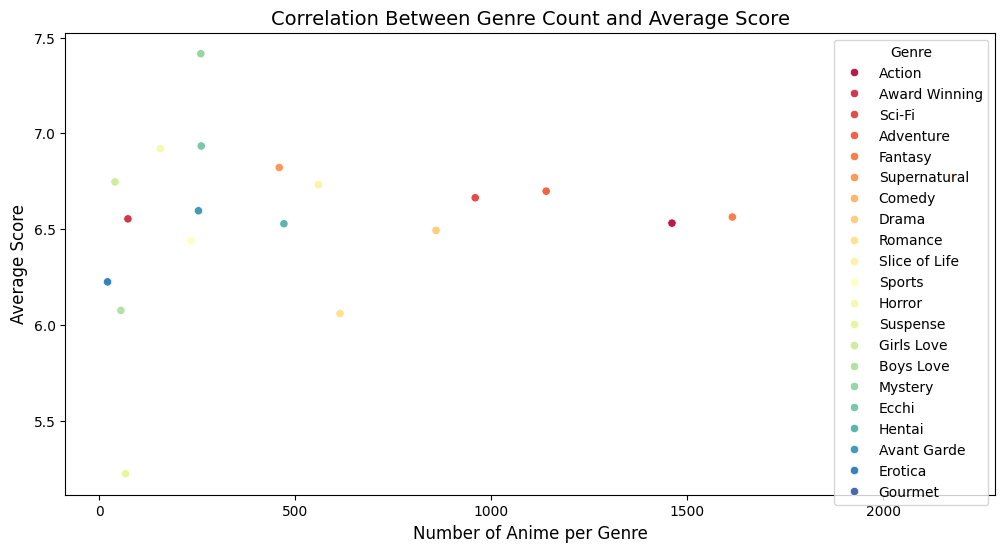

In [126]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=genre_df_clean["Count"], y=genre_stats_df["Avg Score"], hue=genre_df_clean["Genre"], palette="Spectral")
plt.xlabel("Number of Anime per Genre", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.title("Correlation Between Genre Count and Average Score", fontsize=14)
plt.show()


This scatterplot reveals the correlation between the number of anime per genre and their average score. Generally, genres with a higher count tend to have moderate ratings, indicating that mainstream genres have varied quality. Conversely, niche genres, though fewer in count, tend to have either extremely high or low ratings. This suggests that specialized genres often cater to a specific audience, leading to polarized opinions.Additionally, high-rated genres like "Award-Winning" tend to have fewer entries, reinforcing the notion that quality often trumps quantity.


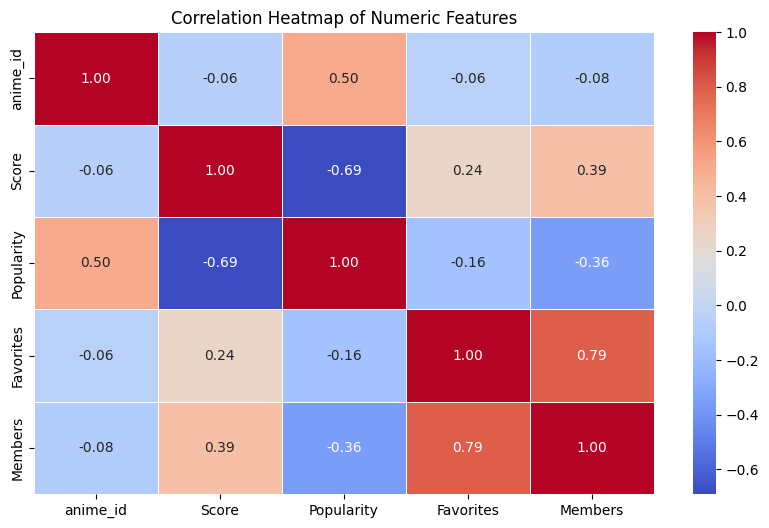

In [127]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The correlation heatmap reveals relationships between numerical features in the dataset. Strong positive or negative correlations highlight how factors like score, popularity, and number of episodes influence each other. For example, if higher scores correlate with more popularity, it suggests that well-rated anime attract larger audiences. Understanding these trends helps in predicting anime success and analyzing viewer preferences.

# Conclusion
This analysis reveals that Comedy, Fantasy, and Action are the most prevalent anime genres, yet they do not necessarily have the highest ratings.

Award-winning, Mystery, and Drama genres tend to score higher on average, indicating strong storytelling and audience impact.

Meanwhile, Adventure and Sports genres dominate in popularity, suggesting that audiences prefer engaging, high-energy content.

The lowest-rated genre, {lowest_rated_genre_name}, tends to have lower scores due to potential issues such as weak storytelling, poor animation quality, or niche appeal.

Further research could involve analyzing seasonal trends or the influence of animation studios on genre success.